<a href="https://colab.research.google.com/github/ZiadMostafa1/Job-Titles-Salaries-Data-Analysis/blob/main/Ziad_ShAI_BootCamp_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

# Data Exploratory

In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/Salaries.csv')
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [192]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


In [194]:
df.nunique()

Id                  148654
EmployeeName        110811
JobTitle              2159
BasePay             109489
OvertimePay          65998
OtherPay             83225
Benefits             98465
TotalPay            138486
TotalPayBenefits    142098
Year                     4
Notes                    0
Agency                   1
Status                   0
dtype: int64

In [195]:
df.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

In [196]:
df[['BasePay', 'OvertimePay', 'OtherPay','Benefits', 'TotalPay', 'TotalPayBenefits', 'Year']].describe()

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,148045.000000,148650.000000,148650.000000,112491.000000,148654.000000,148654.000000,148654.000000
mean,66325.448840,5066.059886,3648.767297,25007.893151,74768.321972,93692.554811,2012.522643
std,42764.635495,11454.380559,8056.601866,15402.215858,50517.005274,62793.533483,1.117538
min,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000
25%,33588.200000,0.000000,0.000000,11535.395000,36168.995000,44065.650000,2012.000000
50%,65007.450000,0.000000,811.270000,28628.620000,71426.610000,92404.090000,2013.000000
75%,94691.050000,4658.175000,4236.065000,35566.855000,105839.135000,132876.450000,2014.000000
max,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000


# Data Cleaning

In [197]:
df[df['OvertimePay'].isnull()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
148646,148647,Not provided,Not provided,NaN,NaN,NaN,NaN,0.0,0.0,2014,NaN,San Francisco,NaN
148650,148651,Not provided,Not provided,NaN,NaN,NaN,NaN,0.0,0.0,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,NaN,NaN,NaN,NaN,0.0,0.0,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,NaN,NaN,NaN,NaN,0.0,0.0,2014,NaN,San Francisco,NaN


In [198]:
df[df['EmployeeName'] == 'Not provided']

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
148646,148647,Not provided,Not provided,NaN,NaN,NaN,NaN,0.0,0.0,2014,NaN,San Francisco,NaN
148650,148651,Not provided,Not provided,NaN,NaN,NaN,NaN,0.0,0.0,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,NaN,NaN,NaN,NaN,0.0,0.0,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,NaN,NaN,NaN,NaN,0.0,0.0,2014,NaN,San Francisco,NaN


In [199]:
df = df[df['EmployeeName'] != 'Not provided']
df[df['EmployeeName'] == 'Not provided']

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status


In [200]:
df[df['BasePay'].isnull()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
81391,81392,Kevin P Cashman,Deputy Chief 3,NaN,0.0,149934.11,0.00,149934.11,149934.11,2013,NaN,San Francisco,NaN
84506,84507,Demetrya Mullens,Licensed Vocational Nurse,NaN,0.0,110485.41,20779.00,110485.41,131264.41,2013,NaN,San Francisco,NaN
84960,84961,Michael M Horan,Park Patrol Officer,NaN,0.0,120000.00,8841.48,120000.00,128841.48,2013,NaN,San Francisco,NaN
90525,90526,Thomas Tang,Police Officer 3,NaN,0.0,106079.31,0.00,106079.31,106079.31,2013,NaN,San Francisco,NaN
90786,90787,Michael C Hill,Deputy Sheriff,NaN,0.0,81299.02,23877.53,81299.02,105176.55,2013,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110526,110527,Arthur L Curry,PS Aide Health Services,NaN,0.0,10.67,0.00,10.67,10.67,2013,NaN,San Francisco,NaN
110527,110528,Nereida Vega,Senior Clerk,NaN,0.0,5.56,0.00,5.56,5.56,2013,NaN,San Francisco,NaN
110528,110529,Timothy E Gibson,Police Officer 3,NaN,0.0,0.00,-2.73,0.00,-2.73,2013,NaN,San Francisco,NaN
110529,110530,Mark E Laherty,Police Officer 3,NaN,0.0,0.00,-8.20,0.00,-8.20,2013,NaN,San Francisco,NaN


In [201]:
df[df['Benefits'].isnull()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36154,36155,SERENA HUGHES,SWIMMING INSTRUCTOR/POOL LIFEGUARD,0.00,0.00,4.17,NaN,4.17,4.17,2011,NaN,San Francisco,NaN
36155,36156,JOE BROWN JR,TRANSIT OPERATOR,0.00,0.00,0.30,NaN,0.30,0.30,2011,NaN,San Francisco,NaN
36156,36157,PAULETTE ADAMS,"STATIONARY ENGINEER, WATER TREATMENT PLANT",0.00,0.00,0.00,NaN,0.00,0.00,2011,NaN,San Francisco,NaN
36157,36158,KAUKAB MOHSIN,TRANSIT OPERATOR,0.00,0.00,0.00,NaN,0.00,0.00,2011,NaN,San Francisco,NaN


In [216]:
df['BasePay'].fillna(0, inplace=True)
df['Benefits'].fillna(0, inplace=True)

In [203]:
df[df['TotalPayBenefits'] <= 0].shape[0]

30

In [204]:
df = df[df['TotalPayBenefits'] > 0]

In [205]:
df.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                  0
OvertimePay              0
OtherPay                 0
Benefits                 0
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148620
Agency                   0
Status              148620
dtype: int64

In [206]:
df.drop(columns = ['Notes','Status'], inplace = True)
df.isnull().sum()

Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64

# Data Visualization

In [207]:
import matplotlib.pyplot as plt
import seaborn as sns

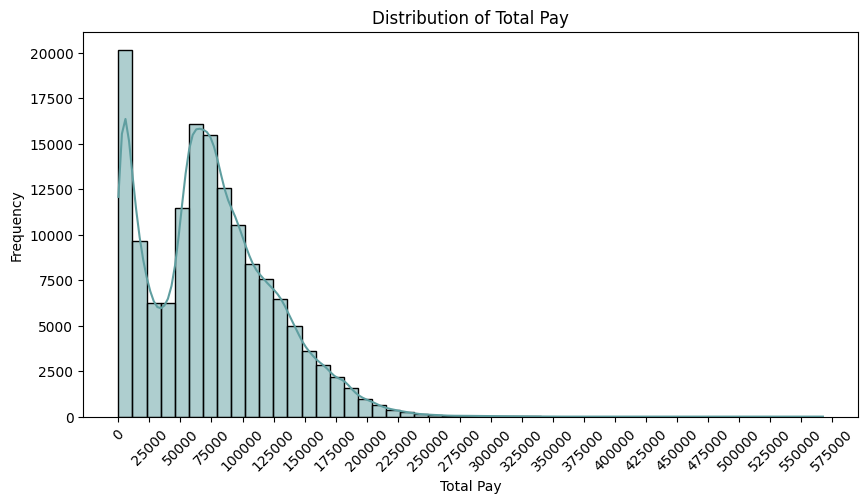

In [208]:
plt.figure(figsize=(10, 5))
sns.histplot(df['TotalPay'], bins=50, kde=True, color='cadetblue',line_kws={'color': 'orange'})
plt.title('Distribution of Total Pay')
plt.xlabel('Total Pay')
plt.ylabel('Frequency')
plt.xticks(range(0,580000,25000), rotation=45)
plt.show()

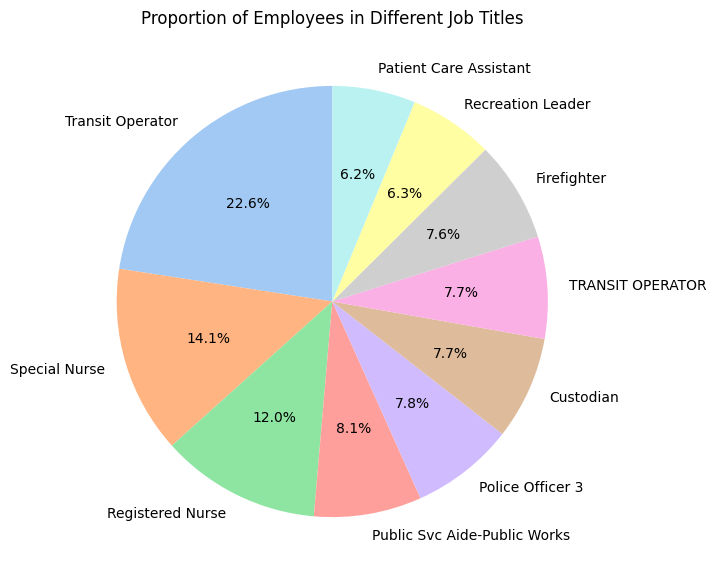

In [209]:
job_counts = df['JobTitle'].value_counts()
top_jobs = job_counts.head(10)

plt.figure(figsize=(7, 7))
plt.pie(top_jobs, labels=top_jobs.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Proportion of Employees in Different Job Titles')
plt.show()

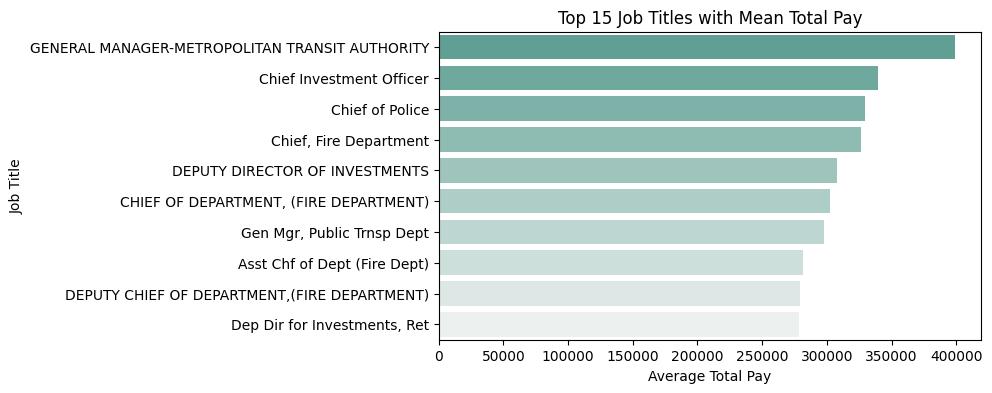

In [210]:
plt.figure(figsize=(7, 4))
job_totalpay_mean = df.groupby('JobTitle')['TotalPay'].mean().sort_values(ascending=False).head(10)

sns.barplot(x=job_totalpay_mean.values, y=job_totalpay_mean.index, hue=job_totalpay_mean.index, palette='light:#5A9_r', dodge=False)
plt.title('Top 15 Job Titles with Mean Total Pay')
plt.xlabel('Average Total Pay')
plt.ylabel('Job Title')
plt.show()

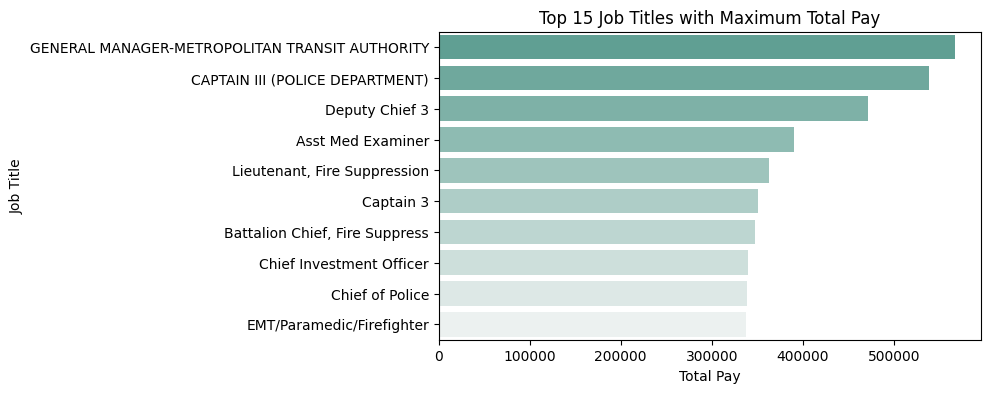

In [211]:
plt.figure(figsize=(7, 4))
job_totalpay_mean = df.groupby('JobTitle')['TotalPay'].max().sort_values(ascending=False).head(10)

sns.barplot(x=job_totalpay_mean.values, y=job_totalpay_mean.index, hue=job_totalpay_mean.index, palette='light:#5A9_r', dodge=False)
plt.title('Top 15 Job Titles with Maximum Total Pay')
plt.xlabel('Total Pay')
plt.ylabel('Job Title')
plt.show()

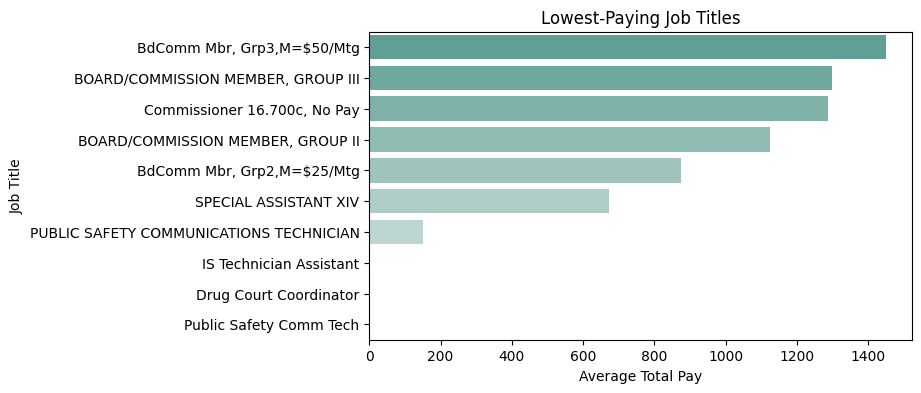

In [212]:
plt.figure(figsize=(7, 4))
job_totalpay_mean = df.groupby('JobTitle')['TotalPay'].max().sort_values(ascending=False).tail(10)

sns.barplot(x=job_totalpay_mean.values, y=job_totalpay_mean.index, hue=job_totalpay_mean.index, palette='light:#5A9_r', dodge=False)
plt.title('Lowest-Paying Job Titles')
plt.xlabel('Average Total Pay')
plt.ylabel('Job Title')
plt.show()

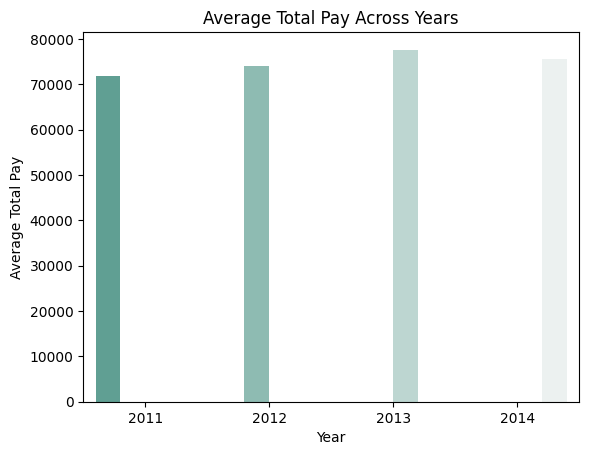

In [213]:
yearly_avg_totalpay = df.groupby('Year')['TotalPay'].mean()

sns.barplot(x=yearly_avg_totalpay.index, y=yearly_avg_totalpay.values, hue=yearly_avg_totalpay.index, palette='light:#5A9_r', dodge=True, legend=False)
plt.title('Average Total Pay Across Years')
plt.xlabel('Year')
plt.ylabel('Average Total Pay')
plt.show()

# Correlation Analysis

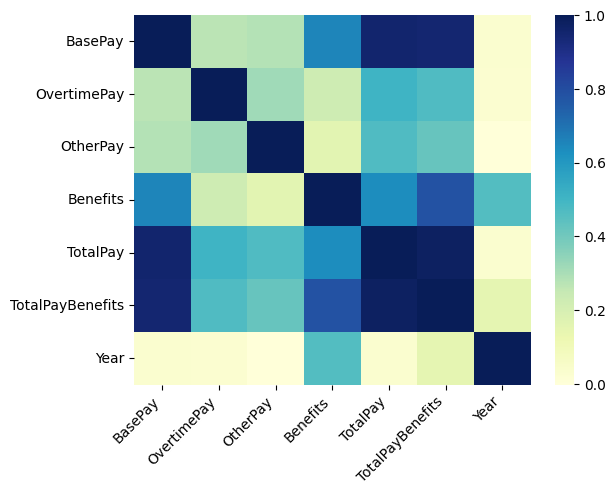

In [214]:
numeric_columns = df[['BasePay', 'OvertimePay', 'OtherPay','Benefits', 'TotalPay', 'TotalPayBenefits', 'Year']]
sns.heatmap(numeric_columns.corr(), cmap='YlGnBu')
plt.xticks(rotation=45, ha='right')
plt.show()

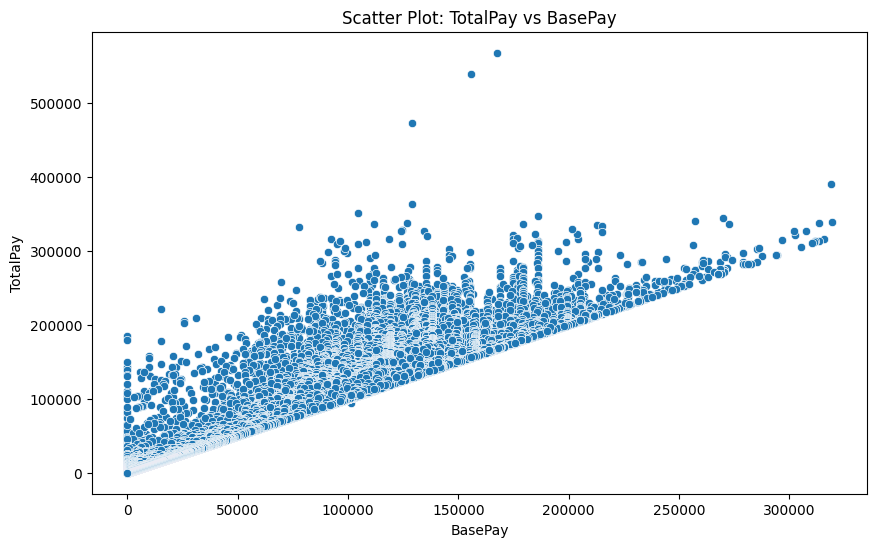

Correlation Coefficient between Total Pay and Base Pay: 0.9546693353921547


In [215]:
correlation_coefficient = df['BasePay'].corr(df['TotalPay'])

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['BasePay'], y=df['TotalPay'])
plt.title('Scatter Plot: TotalPay vs BasePay')
plt.xlabel('BasePay')
plt.ylabel('TotalPay')
plt.show()

print(f"Correlation Coefficient between Total Pay and Base Pay: {correlation_coefficient}")

# Insights Summary

There are 148654 entries, with 13 columns ('Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay','Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency','Status')

We have 4 years (2011, 2012, 2013, 2014)

The min and max values for 'TotalPay' are -618.13 and 567595.43 and std equals 50517.00.

There are null values in 'BasePay' and 'Benefits' but they don’t affect he total ('TotalPay' & 'TotalPayBenefits'), so we can assign their values with 0.

We have 4 rows where the 'EmployeeName' is Not provided so we will just drop them.

We have 30 rows where 'TotalPayBenefits' is less than or equal to Zero so we will drop them too.

We will drop the 'Notes' and 'Status' columns as they only have null values.

Most of the employees’ total pay is from 0to 10000 and from 70000 to 85000.

The ‘Transit Operator’ is the most entered job title in the dataset after it is the ‘Special Nurse’ and ‘Registered Nurse’.

The ‘GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY’ job title is the highest paid title and the ‘Public Safety Comm Tech’ is the lowest paid.

The highest Total pay year is 2013.
As the Base Pay increase the Total pay increase.
